In [1]:
from fileHandler import csvHandler,jsonHandler
import pandas as pd

jh_ = jsonHandler('kode_negara_lengkap.json')
dfJ = jh_.dataFrame
negara = 'Australia'
kode_negara = dfJ[dfJ['name']==negara]['alpha-3'].tolist()[0] 

ch_ = csvHandler('produksi_minyak_mentah.csv')
df = ch_.dataFrame

N = kode_negara

tahun = df[df['kode_negara']==N]['tahun'].tolist()
produksi = df[df['kode_negara']==N]['produksi'].tolist()

# Summary : df -> df (kode negaranya cuma AUS) 
# -> tahun dan produksi aja -> diubah ke list

dic = {'tahun':tahun,'produksi':produksi}
df_ = pd.DataFrame(dic)


<module 'matplotlib.pyplot' from 'c:\\users\\piere\\appdata\\local\\programs\\python\\python38\\lib\\site-packages\\matplotlib\\pyplot.py'>

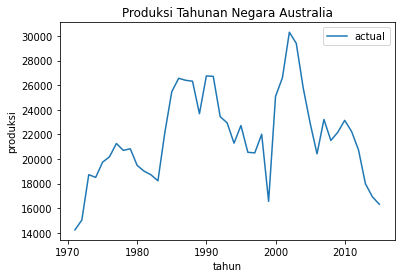

In [2]:
import matplotlib.pyplot as plt

plt.title('Produksi Tahunan Negara {}'.format(negara))
plt.plot(tahun,produksi,label='actual')
plt.xlabel('tahun')
plt.ylabel('produksi')
plt.legend()
plt

In [15]:
T = 2000
B = 5 #banyak negara

df = df[df['tahun']==T]
kode_negara = df[df['tahun']==T]['kode_negara'].tolist()
# produksi = df[df['tahun']==T]['produksi'].tolist()

produksi_maks = []
negara_pertahun = []

kode_negara = list(dict.fromkeys(kode_negara))
for kode in kode_negara:
    try:
        produksi = df[df['kode_negara']==kode]['produksi'].tolist()
        negara = dfJ[dfJ['alpha-3']==kode]['name'].tolist()[0]
        produksi_maks.append(max(produksi))
        negara_pertahun.append(negara)
    except:
        continue
        
dic = {'negara':negara_pertahun,'produksi_maks':produksi_maks}
df__ = pd.DataFrame(dic)
df__ = df__.sort_values('produksi_maks',ascending=False).reset_index()
df__

,index,negara,produksi_maks
0,73,Saudi Arabia,410059.696
1,72,Russian Federation,312820.807
2,29,United States of America,297512.886
3,56,Iran (Islamic Republic of),196876.682
4,133,Venezuela (Bolivarian Republic of),170920.626
...,...,...,...
131,85,Zambia,0.000
132,89,Benin,0.000
133,91,Botswana,0.000
134,94,Costa Rica,0.000


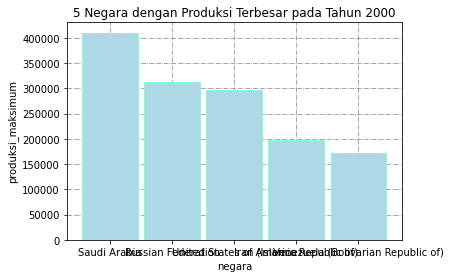

In [25]:
# plotting
plt.title('{B} Negara dengan Produksi Terbesar pada Tahun {T}'.format(B=B,T=T))
plt.bar(df__['negara'][:B],df__['produksi_maks'][:B],width=0.9, bottom=None, align="center",
            color="lightblue", edgecolor="aquamarine", data=None, zorder=3)
plt.grid(True, color="grey", linewidth="0.7", linestyle="-.", zorder=0)
plt.xlabel('negara')
plt.ylabel('produksi_maksimum')
plt.show()